<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_RS_gr2/blob/Sidorov-Alexander-folder/Sidorov%20Alexander/Copy_of_Profpatolog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential      
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization 
from tensorflow.keras import utils    
from tensorflow.keras.optimizers import Adam  
from tensorflow.keras.layers import Input, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import Precision, Recall
import tensorflow as tf
import matplotlib.pyplot as plt    
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [ ]:
#from google.colab import files
#uploaded = files.upload()
import gdown
gdown.download('https://storage.yandexcloud.net/terratraineeship/23_InspectrumClinic_RS/datasets/датасет профпатолог часть.xlsx', None, quiet=True)
df = pd.read_excel(open('датасет профпатолог часть.xlsx','rb'))
df.head()

,ДокументПрохождениеМедосмотра,Клиент,КлиентДатаРождения,КлиентПол,КлиентПолПредставление,ДатаЗавершенияМедосмотра,ТипМедосмотра,ТипМедосмотраПредставление,ПсихОсвидетельствование,Контрагент,...,Оториноларингология3_Аудиометрия1_Значение,Оториноларингология3_Аудиометрия1_ЗначениеПредставление,Оториноларингология1_ЖалобыДополнение_Значение,Оториноларингология1_ЖалобыДополнение_ЗначениеПредставление,Стоматология2_ВП2_Значение,Стоматология2_ВП2_ЗначениеПредставление,Терапия2_ЗаключениеФОГК_Значение,Терапия2_ЗаключениеФОГК_ЗначениеПредставление,Офтальмология1_ДвигательныйАппаратГлазДополнение_Значение,Офтальмология1_ДвигательныйАппаратГлазДополнение_ЗначениеПредставление
0,7f41ca7e-7dac-11ec-80fc-0cc47aab8067,c91e3407-b81f-11e9-80cf-0cc47aab8067,1976-10-24,Женский,Женский,2022-01-25,Периодический,Периодический,False,23c173a7-30d9-11e7-80d8-708bcd7f83cd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2ee1f9ac-83dd-11ec-80fc-0cc47aab8067,1a1a5fea-8b7f-11eb-80e8-0cc47aab8067,1987-11-18,Мужской,Мужской,2022-02-02,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9cbb191e-8e24-11ec-80fe-0cc47aab8067,7fe324e0-fa51-11eb-80f6-0cc47aab8067,1985-09-08,Мужской,Мужской,2022-02-15,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b8a33910-8eec-11ec-80fe-0cc47aab8067,98f9d761-8d65-11ec-80fe-0cc47aab8067,1988-04-25,Мужской,Мужской,2022-02-16,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0bb0d181-938c-11ec-80fe-0cc47aab8067,009aac7d-7bcf-11eb-80e8-0cc47aab8067,1984-04-17,Мужской,Мужской,2022-02-22,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Вывод количества записей по классам
def print_class(df, column_name, class_list):
  print(class_list)
  for class_name in class_list:
    count = len(df[df[column_name] == class_name])
    print(f'Количество записей для класса {class_name}: {count}')

In [ ]:
# Удаление строк без заключения
print(df.shape)
class_list =['Годен','ГоденСКоррекциейЗрения','НуждаетсяВДообследованииИЛечении','ВременноНегоден','ОграниченноГоден','ГоденБезРаботНаВысотах']
mask= df['ЗаключениеМК'].str.contains('|'.join(class_list))>0
df = df[ mask]
print(df.shape)
# количество записей по классам
print_class(df, 'ЗаключениеМК', class_list)
# Сокращение классов до 3
df['ЗаключениеМК'].replace('ГоденСКоррекциейЗрения', 'ОграниченноГоден', inplace=True)
df['ЗаключениеМК'].replace('ГоденБезРаботНаВысотах', 'ОграниченноГоден', inplace=True)
df['ЗаключениеМК'].replace('НуждаетсяВДообследованииИЛечении', 'ВременноНегоден', inplace=True)
# количество записей по классам
class_list =['Годен','ВременноНегоден','ОграниченноГоден']
print_class(df, 'ЗаключениеМК', class_list)

(1982, 4587)
(1571, 4587)
['Годен', 'ГоденСКоррекциейЗрения', 'НуждаетсяВДообследованииИЛечении', 'ВременноНегоден', 'ОграниченноГоден', 'ГоденБезРаботНаВысотах']
Количество записей для класса Годен: 1434
Количество записей для класса ГоденСКоррекциейЗрения: 123
Количество записей для класса НуждаетсяВДообследованииИЛечении: 2
Количество записей для класса ВременноНегоден: 9
Количество записей для класса ОграниченноГоден: 2
Количество записей для класса ГоденБезРаботНаВысотах: 1
['Годен', 'ВременноНегоден', 'ОграниченноГоден']
Количество записей для класса Годен: 1434
Количество записей для класса ВременноНегоден: 11
Количество записей для класса ОграниченноГоден: 126


<ipython-input-5-b4a2e9b2155a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ЗаключениеМК'].replace('ГоденСКоррекциейЗрения', 'ОграниченноГоден', inplace=True)
<ipython-input-5-b4a2e9b2155a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ЗаключениеМК'].replace('ГоденБезРаботНаВысотах', 'ОграниченноГоден', inplace=True)
<ipython-input-5-b4a2e9b2155a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ЗаключениеМК'].rep

In [ ]:
# Поиск колонок с выводом 5 уникальных значений
def Find_Column(df, name):
  pred_cols = [col for col in df.columns if name in col]
  print(f'Найдено {len(pred_cols)} колонок')
  i = 1
  for column_name in pred_cols:
      print(f'{i} {column_name}')
      i+=1
      unique_data = df[column_name].unique()
      print(f'   {unique_data[0:5]}')

In [ ]:
Find_Column( df, 'ГоденНегоден_ЗначениеПредставление')

Найдено 31 колонок
1 ПсихиатрияНаркология1_ГоденНегоден_ЗначениеПредставление
   ['Годен' nan 'Не годен']
2 Офтальмология1_ГоденНегоден_ЗначениеПредставление
   ['Годен' nan]
3 Оториноларингология1_ГоденНегоден_ЗначениеПредставление
   ['Годен' nan]
4 ХирургНеИсп1_ГоденНегоден_ЗначениеПредставление
   ['Годен' nan]
5 Гинекология1_ГоденНегоден_ЗначениеПредставление
   ['Годен' nan 'Не годен']
6 Стоматология1_ГоденНегоден_ЗначениеПредставление
   ['Годен' nan]
7 Терапия1_ГоденНегоден_ЗначениеПредставление
   ['Годен' nan 'Не годен']
8 Дерматовенерология1_ГоденНегоден_ЗначениеПредставление
   [nan 'Годен']
9 Неврология1_ГоденНегоден_ЗначениеПредставление
   [nan 'Годен' 'Не годен']
10 Хирургия1_ГоденНегоден_ЗначениеПредставление
   [nan 'Годен']
11 Хирургия2_ГоденНегоден_ЗначениеПредставление
   [nan 'Годен']
12 Терапия2_ГоденНегоден_ЗначениеПредставление
   [nan 'Годен' 'Не годен']
13 Неврология2_ГоденНегоден_ЗначениеПредставление
   [nan 'Годен']
14 ПсихиатрияНаркология2_ГоденНегоден_Зн

In [ ]:
Find_Column( df, 'МКБ')

Найдено 92 колонок
1 ПсихиатрияНаркология1_МКБ101
   ['Z00.0' nan 'F06.6' 'F06.7' 'F41.0']
2 Офтальмология1_МКБ101
   ['Z00.0' 'H52.1' 'H52.2' nan 'H52.0']
3 Оториноларингология1_МКБ101
   ['Z00.0' nan 'H90.5' 'H90.3' 'H91.1']
4 ХирургНеИсп1_МКБ101
   ['Z00.0' nan]
5 Гинекология1_МКБ101
   ['Z00.0' nan 'N60.2' 'D25' 'N83.2']
6 Стоматология1_МКБ101
   ['Z00.0' nan 'I11.9' 'H52.1']
7 Дерматовенерология1_МКБ101
   [nan 'Z00.0' 'L40.0']
8 Рентгенология1_МКБ101
   [nan 'Z00.0']
9 Неврология1_МКБ101
   [nan 'Z00.0' 'M42.1' 'I69.4' 'G12.1']
10 Терапия1_МКБ101
   [nan 'I11.9' 'Z00.0' 'K29.3' 'I70']
11 Хирургия1_МКБ101
   [nan 'Z00.0' 'S68.2' 'I83.9' 'K40.9']
12 Офтальмология1_МКБ102
   [nan 'H53.0' 'H52.1' 'I25.8' 'H52.0']
13 Терапия2_МКБ101
   [nan 'Z00.0' 'I11.9' 'K29.3']
14 Неврология2_МКБ101
   [nan 'Z00.0' 'I66.9']
15 ЛабораторныеИсследования1_МКБ101
   [nan 'Z00.0']
16 ЭКГНеИсп1_МКБ101
   [nan 'Z00.0']
17 УЗИДиагностика1_МКБ101
   [nan 'Z00.0' 'N60.2' 'K80.5' 'K86.1']
18 УЗИДиагностика2_

In [ ]:
# Список столбцов с заключениями
fit_columns = [df.columns.get_loc(col) for col in df.columns if 'ГоденНегоден_ЗначениеПредставление' in col]
fit_class = [0,class_list]
# Список столбцов с классификацией болезней
diseases_columns = [col for col in df.columns if 'МКБ' in col]
# Классы МКБ
diseases_class = np.array([])
for col in diseases_columns:
    diseases_class = np.concatenate([diseases_class, df[col].dropna().unique()])
diseases_class = np.unique(diseases_class)
diseases_class =[0,diseases_class.tolist()]
diseases_columns = [df.columns.get_loc(col) for col in df.columns if 'МКБ' in col]
# Классы порогов возраста
age_class = [0, [18, 23, 28, 33, 38, 43, 48, 53, 58, 63]]
#Классы профессий
prof_data = df['Профессия'].unique()
prof_class=[0,prof_data.tolist()]
#Классы цехов
workshop_data = df['Цех'].unique()
workshop_class=[0,workshop_data.tolist()]
# Классы вредности
hazard_class = []
for row in df['ВредныеФакторы']:
    keys = row.split(',')
    for key in keys:
        if key not in hazard_class:
            hazard_class.append(key)
hazard_class.sort()
hazard_class=[0,hazard_class]
# Вычисление счетчиков для данных разбиения
for class_desc in [age_class, prof_class, workshop_class, hazard_class, fit_class, diseases_class]:
  if isinstance(class_desc[1], list):
    class_desc[0] = len(class_desc[1]) + 1
  else:
    class_desc[0] = max(class_desc[1].values()) + 1

In [ ]:
def int_to_ohe(arg, class_list):
  # Определение размерности выходного вектора
  num_classes = class_list[0]
  # Поиск верного интервала для входного значения
  for i in range(num_classes - 1):
    if arg < class_list[1][i]:
      cls = i                       # Интервал найден - назначение класса
      break
    else:                                 # Внимание: for/else
      cls = num_classes - 1             # Интервал не найден - последний класс
  # Возврат в виде one hot encoding-вектора
  return utils.to_categorical(cls, num_classes)

def str_to_multi(arg, class_dict):
  # Определение размерности выходного вектора
  num_classes = class_dict[0]
  # Создание нулевого вектора
  result = np.zeros(num_classes)
  # Поиск значения в словаре и, если найдено,
  # выставление 1. на нужной позиции
  if type(arg) is str:
    if type(class_dict[1]) is list:
      for cls, value in enumerate(class_dict[1]):
        if value == arg:
          result[cls] = 1.
    else:
      for value, cls in class_dict[1].items():
        if value == arg:
          result[cls] = 1.
  return result

In [ ]:
#from pandas.core.apply import relabel_result

def age_years_to_ohe(arg):
  return int_to_ohe(arg, age_class)

def sex_to_ohe(arg):
  result = 1. if 'Мужской' in arg else 0.
  return result

def extract_prof_to_multi(arg):
  return str_to_multi(arg, prof_class)
  
def extract_workshop_to_multi(arg):
  return str_to_multi(arg, workshop_class)

def extract_hazard_to_multi(arg):
  result = np.zeros(hazard_class[0])
  keys = arg.split(',')
  for arg in keys:
    result = result+str_to_multi(arg, hazard_class)
  return result
  
def extract_fit_to_multi(arg):
  result = np.zeros(0)
  for col in fit_columns:
    result = np.append(result, str_to_multi(arg[col], fit_class))
  return result

def extract_diseases_to_multi(arg):
  result = np.zeros(diseases_class[0])
  for col in diseases_columns:
    result = np.logical_or(result, str_to_multi(arg[col], diseases_class))
    return result

In [ ]:
def extract_row_data(row):
  # Извлечение и преобразование данных
  # Возраст
  age = age_years_to_ohe((row[5].year-row[2].year))
  # Пол
  sex = np.array(sex_to_ohe(row[3]))
  # Профессия
  prof = extract_prof_to_multi(row[11])
  # Цех
  workshop = extract_workshop_to_multi(row[10])
  # Вредность
  hazard = extract_hazard_to_multi(row[17])
  # Заключения специалистов
  fit = extract_fit_to_multi(row)
  #print(f'fit class {fit}')
  diseases = extract_diseases_to_multi(row)  
  #print(f'diseases class {diseases}')
  x_data = np.hstack([age, sex, prof, workshop, hazard, fit, diseases])
  x_data1 = np.hstack([age, sex, prof, workshop])
  x_data2 = np.hstack([hazard, fit, diseases])
  y_data = class_list.index(row[12])
#  print(f'x_data {len(x_data)} y_data {len(y_data)} ')
#  print(f'\n x {x_data} y {y_data}')
  return x_data, y_data, x_data1, x_data2
  
# Создание общей выборки
def construct_train_data(row_list):
  x_data = []
  x_data1 = []
  x_data2 = []
  y_data = []
  for row in row_list:
    x, y, x1, x2 = extract_row_data(row)
    x_data.append(x)
    y_data.append(y)
    x_data1.append(x1)
    x_data2.append(x2)
  return np.array(x_data), np.array(y_data), np.array(x_data1), np.array(x_data2)

In [ ]:
x_data, y_data, x_data1, x_data2 = construct_train_data(df.values)
# Перевод в one hot encoding
y_data = utils.to_categorical(y_data, 3)
# Разбиение наборов на общую и тестовую выборки
x_all, x_test, y_all, y_test = train_test_split(x_data, 
                                                y_data, 
                                                test_size=0.1, 
                                                shuffle=True, 
                                                random_state = 6)
# Разбиваем данные на обучающую, валидационную и тестовую выборки для одного вектора
x_train, x_val, y_train, y_val = train_test_split(x_all, 
                                                  y_all, 
                                                  test_size=0.1, 
                                                  shuffle=True, 
                                                  random_state = 6)
print(f'Вектора для одного слоя')
print(f' x_data {x_data.shape} \t x_train {x_train.shape} \t x_val {x_val.shape} \t x_test {x_test.shape} \t x_data1 {x_data1.shape} \t x_data2 {x_data2.shape}')
print(f' y_data {y_data.shape} \t y_train {y_train.shape} \t y_val {y_val.shape} \t y_test {y_test.shape} ')
print(f'Вектора для двух слоев')
# Разбиваем данные на обучающую, валидационную и тестовую выборки для двух векторов
x_train1, x_val1, x_train2, x_val2, y_train1, y_val1 = train_test_split(x_data1, x_data2, y_data, test_size=0.4, random_state=42)
x_val1, x_test1, x_val2, x_test2, y_val1, y_test1 = train_test_split(x_val1, x_val2, y_val1, test_size=0.5, random_state=42)
print(f' x_train1 {x_train1.shape} x_train2 {x_train2.shape} y_train1 {y_train1.shape} | x_val1 {x_val1.shape} x_val2 {x_val2.shape} y_val {y_val1.shape} | x_test1 {x_test1.shape} x_test2 {x_test2.shape} y_test {y_test1.shape} ')

Вектора для одного слоя
 x_data (1571, 1047) 	 x_train (1271, 1047) 	 x_val (142, 1047) 	 x_test (158, 1047) 	 x_data1 (1571, 744) 	 x_data2 (1571, 303)
 y_data (1571, 3) 	 y_train (1271, 3) 	 y_val (142, 3) 	 y_test (158, 3) 
Вектора для двух слоев
 x_train1 (942, 744) x_train2 (942, 303) y_train1 (942, 3) | x_val1 (314, 744) x_val2 (314, 303) y_val (314, 3) | x_test1 (315, 744) x_test2 (315, 303) y_test (315, 3) 


In [ ]:
# Оценка модели на тестовых данных и построение графиков 
def evaluate_model(model, x_test, y_test):
    # Оценка точности и потери на тестовых данных
    loss, accuracy = model.evaluate(x_test, y_test)
    print("Test Loss: {:.3f}".format(loss))
    print("Test Accuracy: {:.3f}".format(accuracy))
    
    # Получение прогноза модели на тестовых данных
    y_pred = model.predict(x_test)
    
    # Преобразование one-hot кодирования прогноза в номер класса
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    
    # Построение матрицы ошибок 
    from sklearn.metrics import confusion_matrix
    conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
    
    # Построение графика точности и потери с изменением количества эпох
    epochs = range(1, len(history.history['accuracy']) + 1)
    plt.plot(epochs, history.history['accuracy'], 'bo', label='Training accuracy')
    plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
    plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # Построение диаграммы матрицы ошибок 
    import seaborn as sns
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_list, 
                yticklabels=class_list)
    plt.title('Матрица предсказаний')
    plt.xlabel('Предсказано')
    plt.ylabel('Верно')
    plt.show()

# Вывод предсказанных и верных значений
def Print_Predict(model, x_test, y_test):
  y_pred = model.predict(x_test)
  y_pred_classes = np.argmax(y_pred, axis=1)
  y_test_classes = np.argmax(y_test, axis=1)
  correct_preds = (y_pred_classes == y_test_classes)
  for i in range(len(y_pred)):
    print('Предсказанный класс:', y_pred_classes[i], '| Верный класс:', y_test_classes[i], '| Прогноз:', 'ВЕРНО' if (correct_preds[i]) else 'НЕВЕРНО')
  accuracy = sum(correct_preds)/len(correct_preds)
  print('Точность на тестовом наборе: {:.2f}% из {$d} значений'.format(accuracy*100),len(y_pred))

Epoch 1/100
15/15 [==============================] - 2s 19ms/step - loss: 0.7661 - accuracy: 0.8673 - val_loss: 0.4584 - val_accuracy: 0.9140
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.3833 - accuracy: 0.9172 - val_loss: 0.3584 - val_accuracy: 0.9140
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 0.3266 - accuracy: 0.9172 - val_loss: 0.3182 - val_accuracy: 0.9140
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2913 - accuracy: 0.9172 - val_loss: 0.3023 - val_accuracy: 0.9140
Epoch 5/100
15/15 [==============================] - 0s 10ms/step - loss: 0.2710 - accuracy: 0.9172 - val_loss: 0.2944 - val_accuracy: 0.9140
Epoch 6/100
15/15 [==============================] - 0s 9ms/step - loss: 0.2496 - accuracy: 0.9172 - val_loss: 0.2894 - val_accuracy: 0.9140
Epoch 7/100
15/15 [==============================] - 0s 7ms/step - loss: 0.2267 - accuracy: 0.9172 - val_loss: 0.2871 - val_accuracy: 0.9140
Epoch 8/100

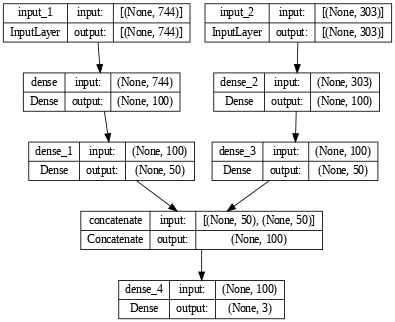

In [ ]:
# Модель с двумя входными слоями
input_layer1 = Input(shape=(744,))
input_layer2 = Input(shape=(303,))
layer_1 = Dense(units=100, activation='relu')(input_layer1)
layer_1 = Dense(units=50, activation='relu')(layer_1)
layer_2 = Dense(units=100, activation='relu')(input_layer2)
layer_2 = Dense(units=50, activation='relu')(layer_2)
# Объединяем потоки данных
merged_layer = Concatenate()([layer_1, layer_2])
output_layer = Dense(units=3, activation='softmax')(merged_layer)
model1 = Model(inputs=[input_layer1,input_layer2], outputs=output_layer)
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model1.fit([x_train1, x_train2], y_train1, epochs=100, batch_size=64, validation_data=([x_val1, x_val2], y_val1))
# Выводим информацию о модели
model1.summary()
plot_model(model1, dpi=60, show_shapes=True)


In [ ]:
Print_Predict(model1, [x_test1, x_test2] , y_test1)

10/10 [==============================] - 0s 1ms/step
Предсказанный класс: 0 | Верный класс: 0 | Прогноз: ВЕРНО
Предсказанный класс: 0 | Верный класс: 2 | Прогноз: НЕВЕРНО
Предсказанный класс: 2 | Верный класс: 0 | Прогноз: НЕВЕРНО
Предсказанный класс: 0 | Верный класс: 0 | Прогноз: ВЕРНО
Предсказанный класс: 0 | Верный класс: 0 | Прогноз: ВЕРНО
Предсказанный класс: 0 | Верный класс: 0 | Прогноз: ВЕРНО
Предсказанный класс: 0 | Верный класс: 0 | Прогноз: ВЕРНО
Предсказанный класс: 0 | Верный класс: 0 | Прогноз: ВЕРНО
Предсказанный класс: 0 | Верный класс: 2 | Прогноз: НЕВЕРНО
Предсказанный класс: 0 | Верный класс: 0 | Прогноз: ВЕРНО
Предсказанный класс: 0 | Верный класс: 0 | Прогноз: ВЕРНО
Предсказанный класс: 0 | Верный класс: 0 | Прогноз: ВЕРНО
Предсказанный класс: 0 | Верный класс: 0 | Прогноз: ВЕРНО
Предсказанный класс: 0 | Верный класс: 0 | Прогноз: ВЕРНО
Предсказанный класс: 0 | Верный класс: 0 | Прогноз: ВЕРНО
Предсказанный класс: 0 | Верный класс: 0 | Прогноз: ВЕРНО
Предсказанный

KeyError: ignored

Epoch 1/20
10/10 [==============================] - 1s 22ms/step - loss: 1.3487 - accuracy: 0.3541 - val_loss: 1.1146 - val_accuracy: 0.2465
Epoch 2/20
10/10 [==============================] - 0s 10ms/step - loss: 1.1435 - accuracy: 0.4524 - val_loss: 1.0246 - val_accuracy: 0.7958
Epoch 3/20
10/10 [==============================] - 0s 10ms/step - loss: 1.0236 - accuracy: 0.5193 - val_loss: 0.9277 - val_accuracy: 0.9225
Epoch 4/20
10/10 [==============================] - 0s 7ms/step - loss: 0.8966 - accuracy: 0.6035 - val_loss: 0.8425 - val_accuracy: 0.9296
Epoch 5/20
10/10 [==============================] - 0s 7ms/step - loss: 0.7860 - accuracy: 0.6884 - val_loss: 0.7557 - val_accuracy: 0.9296
Epoch 6/20
10/10 [==============================] - 0s 7ms/step - loss: 0.6915 - accuracy: 0.7655 - val_loss: 0.6607 - val_accuracy: 0.9296
Epoch 7/20
10/10 [==============================] - 0s 8ms/step - loss: 0.6059 - accuracy: 0.8088 - val_loss: 0.5770 - val_accuracy: 0.9296
Epoch 8/20
10/10 

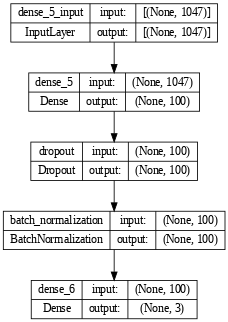

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=x_train.shape[1], activation="relu"))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))
model.summary()
plot_model(model, dpi=60, show_shapes=True)

In [ ]:
Print_Predict(model, x_test , y_test)

5/5 [==============================] - 0s 2ms/step
Предсказанный класс: 0 | Верный класс: 0 | Прогноз: ВЕРНО
Предсказанный класс: 0 | Верный класс: 0 | Прогноз: ВЕРНО
Предсказанный класс: 0 | Верный класс: 0 | Прогноз: ВЕРНО
Предсказанный класс: 0 | Верный класс: 0 | Прогноз: ВЕРНО
Предсказанный класс: 0 | Верный класс: 0 | Прогноз: ВЕРНО
Предсказанный класс: 0 | Верный класс: 0 | Прогноз: ВЕРНО
Предсказанный класс: 0 | Верный класс: 0 | Прогноз: ВЕРНО
Предсказанный класс: 0 | Верный класс: 0 | Прогноз: ВЕРНО
Предсказанный класс: 0 | Верный класс: 0 | Прогноз: ВЕРНО
Предсказанный класс: 0 | Верный класс: 0 | Прогноз: ВЕРНО
Предсказанный класс: 0 | Верный класс: 0 | Прогноз: ВЕРНО
Предсказанный класс: 0 | Верный класс: 0 | Прогноз: ВЕРНО
Предсказанный класс: 0 | Верный класс: 0 | Прогноз: ВЕРНО
Предсказанный класс: 0 | Верный класс: 0 | Прогноз: ВЕРНО
Предсказанный класс: 0 | Верный класс: 0 | Прогноз: ВЕРНО
Предсказанный класс: 0 | Верный класс: 0 | Прогноз: ВЕРНО
Предсказанный класс: 

5/5 [==============================] - 0s 3ms/step - loss: 0.2320 - accuracy: 0.9494
Test Loss: 0.232
Test Accuracy: 0.949
5/5 [==============================] - 0s 2ms/step


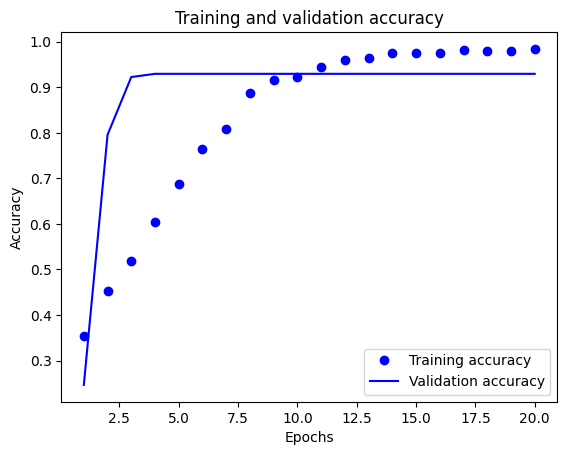

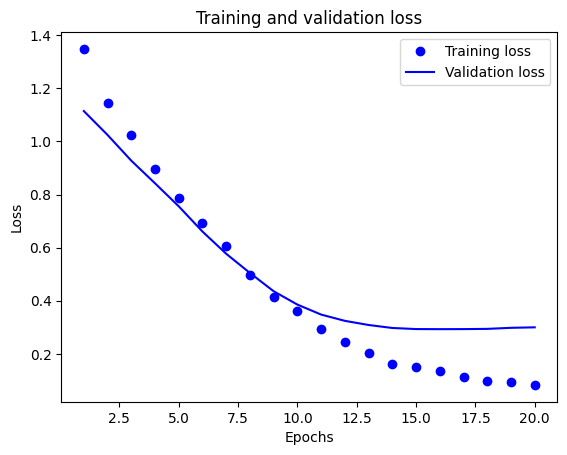

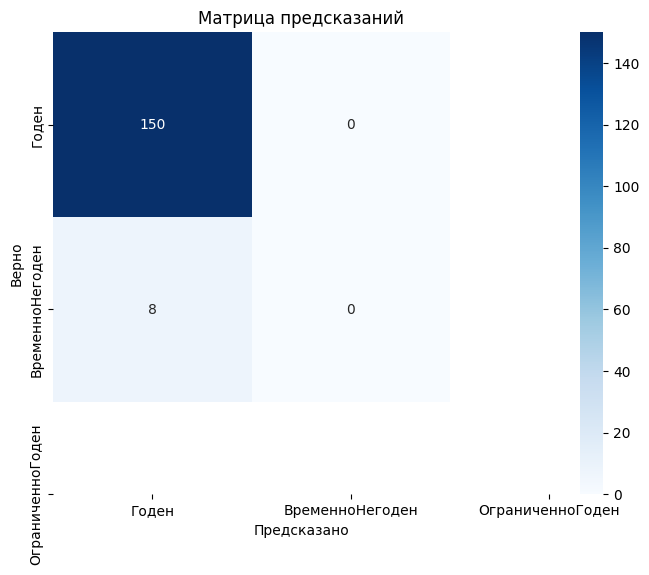

In [ ]:
evaluate_model(model, x_test, y_test)